In [1]:
import matplotlib
import numpy as np
import pandas as pd
import time
import tqdm
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pymorphy2
import warnings
warnings.filterwarnings("ignore")

In [2]:

# import artm
import nltk
import feedparser
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayuts\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import artm

C:\Program Files (x86)\BigARTM\python\artm\master_component.py:643: DeprecationWarning: invalid escape sequence \*
  """
C:\Program Files (x86)\BigARTM\python\artm\master_component.py:753: DeprecationWarning: invalid escape sequence \d
  """
C:\Program Files (x86)\BigARTM\python\artm\master_component.py:826: DeprecationWarning: 'async' and 'await' will become reserved keywords in Python 3.7
  apply_weight=None, decay_weight=None, async=None):


In [4]:
data = pd.read_csv('gender-tense_data.csv');
data = data.fillna('')

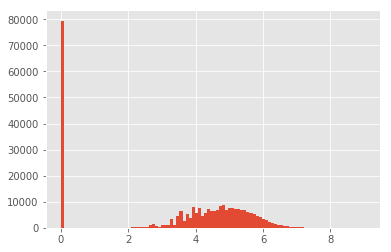

In [59]:
data['Анамнез заболевания'].apply(lambda x: np.log(len(x)+1)).hist(bins=100);

In [60]:
morph = pymorphy2.MorphAnalyzer()

In [93]:
data.sample(30)

,ID,Revisit,Unnamed: 0,female,futr,lemm,male,past,pres,sex,text,Анамнез заболевания,Внешний осмотр,Возраст,Диагноз,Код_диагноза,Общее состояние,Пол,аллергия
4461,4461,1,4461,2,0,гсд в год мес назаднеразвберть нед мёд в начало декабрь переохлаждение стресс обследование матерь на предмет после что стать отмечать вышеуказанный жалоба консультировать отоларинголог в смклиника...,0,2,1,2.0,гсд в году мес назаднеразвберть нед меда в начале декабря переохлаждение стресс обследование матери на предмет после чего стала отмечать вышеуказанные жалобы консультирована отоларинголо...,"ГСД в 2016 году. 5 мес назад-неразв.бер-ть (8-9 нед) мед/а В начале декабря переохлаждение, стресс (обследование матери на предмет mts) после чего стала отмечать вышеуказанные жалобы. Консуль...",,31,"Уретрит при болезнях, классифицированных в других рубриках",N37.0*,,1,
195528,195528,1,195528,1,0,боль около год периодич травма отрицать лечиться в полка у ортопед получать фтл,0,1,2,2.0,боли около лет периодич травмы отрицает лечится в полке у ортопеда получала фтл,"Боли около 5 лет, периодич. Травмы отрицает. Лечится в пол-ке у ортопеда, получала ФТЛ",,34,Другие доброкачественные новообразования кожи,D23,"Общее самочувствие удовлетворительное. Кожные покровы и видимые слизистые обычной окраски. Язык чистый, влажный. Живот мягкий безболезненный во всех отделах. Стул, мочеиспускание не нарушены",2,
169034,169034,1,169034,0,0,,0,0,0,NaN,,,,36,"Другие специальные осмотры и обследования лиц, не имеющих жалоб или установленного диагноза",Z01,"Удовлетворительное. Температура тела - 36,6. Периферических отёков нет. Кожные покровы чистые , нормальной влажности, обычной окраски. Щитовидная железа не увеличена, безболезненная. Дизурические ...",2,
205354,205354,0,205354,1,0,явиться по резтам узи орган малое таз,0,1,0,2.0,явилась по резтам узи органов малого таза,явилась по рез-там УЗИ органов малого таза,,46,Гастроэзофагеальный рефлюкс с эзофагитом,K21.0,,2,
84067,84067,1,84067,1,0,провести курс назначить лечение отмечать улучшение состояние на кт онп от пристеночный утолщение лизистый оболочка оба вч пазуха в область альвеолярный бухта,0,1,1,2.0,провела курс назначенного лечения отмечает улучшения состояния на кт онп от пристеночное утолщение лизистой оболочки обеих вч пазух в области альвеолярных бухт,"провела курс назначенного лечения, отмечает улучшения состояния на КТ ОНП от 07.11.16 - пристеночное утолщение лизистой оболочки обеих в/ч пазух в области альвеолярных бухт",,21,Кандидоз вульвы и вагины (n77.1*),B37.3+,,2,
237826,237826,1,237826,0,0,,0,0,0,NaN,,,,31,"Вагинит, вульвит и вульвовагинит при инфекционных и паразитарных болезнях, классифицированных в других рубриках",N77.1*,удовлетворительное.,2,
197920,197920,1,197920,0,0,,0,0,0,NaN,,,,58,Шейно-черепной синдром,M53.0,относительно удовлетворительное,2,
211466,211466,1,211466,0,0,подойти с результат обследование,1,1,0,1.0,подошел с результатами обследования,подошел с результатами обследования,,40,Острая инфекция верхних дыхательных путей неуточненная,J06.9,,2,
205152,205152,1,205152,0,0,,0,0,0,NaN,,,,32,Хронический конъюнктивит,H10.4,,2,Аллергию на лекарства - отрицает
94402,94402,1,94402,0,0,,0,0,0,NaN,,,,43,Острый вагинит,N76.0,относительно удовлетворительное,2,


In [ ]:
"""X_diag = data['Диагноз']
X_ana = data['Анамнез заболевания']
X_vnosm = data['Внешний осмотр']
X_age = data['Возраст'].values
X_sex = data['Пол'].values


n_samples = len(X_diag.values)
print(n_samples)
corpus = np.hstack((X_diag.values, X_vnosm))
vectorizer = CountVectorizer(min_df = 3/(2*len(corpus)), token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+',
                             max_features = 10000, ngram_range=(1,2))
#vectorizer = CountVectorizer(min_df = 3/(2*len(corpus)), max_features = 10000, stop_words = ['NaN'])
print(corpus.shape)
D = vectorizer.fit_transform(corpus)
dict = vectorizer.get_feature_names()
print(len(dict))
"""

In [62]:
X_text = data['text']
corpus = X_text.values
vectorizer = CountVectorizer(min_df = 2, stop_words={'russian'})
D = vectorizer.fit(corpus)
len(D.vocabulary_)

44144

In [63]:
X_lemm = data['lemm']
corpus = X_lemm.values
vectorizer = CountVectorizer(min_df = 1, stop_words={'russian'})
D2 = vectorizer.fit(corpus)
len(D2.vocabulary_)

63565

In [64]:
stop_eng = nltk.corpus.stopwords.words('english')
stop_rus = nltk.corpus.stopwords.words('russian')

In [65]:
stop_rus[0:30]

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне']

In [66]:
all_text = np.concatenate(data['text'].apply (lambda s: s.strip().split()))
all_lemm = np.concatenate(data['lemm'].apply (lambda s: s.strip().split()))

In [67]:
all_words = set(all_text)
all_words_lemm = set(all_lemm)

In [68]:
print('number all words lemm:', len(all_words_lemm))

number all words lemm: 63589


In [69]:
print('number all words:', len(all_words))

number all words: 95559


In [70]:
count = pd.Series(all_lemm).value_counts()

In [71]:
count[count==2]

неделиусиливаться                          2
наливаться                                 2
осотрение                                  2
нормализваться                             2
пропилить                                  2
занить                                     2
тизанидина                                 2
окувайта                                   2
цитостатик                                 2
ознакомленараный                           2
оцииллококцинум                            2
свтахикардия                               2
ринофаринголаринготрахеит                  2
жпсо                                       2
далитк                                     2
солодк                                     2
ституация                                  2
затяния                                    2
тойж                                       2
отрц                                       2
тазааденомиоз                              2
кокцигодиния                               2
послдедний

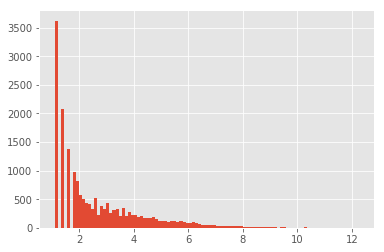

In [72]:
count[count>2].apply(lambda x: np.log(x)).hist(bins=100);

In [73]:
count[count>2]

в                         210302
с                         137761
год                        91132
на                         89960
не                         83702
по                         69093
боль                       61111
и                          52113
лечение                    51578
течение                    45811
жалоба                     45730
день                       38762
беспокоить                 35911
обследование               35177
к                          32878
неделя                     31411
отмечать                   31088
около                      30885
фон                        30719
обратиться                 28858
принимать                  28579
назад                      26651
месяц                      25537
после                      24727
последний                  23613
лечиться                   23297
самостоятельно             23158
появиться                  21445
без                        21152
для                        20825
          

In [74]:
words_ser = pd.Series(all_lemm)
without_stop = words_ser[~words_ser.isin(stop_rus)]

In [75]:
count2 = without_stop.value_counts()
count2

год                                     91132
боль                                    61111
лечение                                 51578
течение                                 45811
жалоба                                  45730
день                                    38762
беспокоить                              35911
обследование                            35177
неделя                                  31411
отмечать                                31088
около                                   30885
фон                                     30719
обратиться                              28858
принимать                               28579
назад                                   26651
месяц                                   25537
последний                               23613
лечиться                                23297
самостоятельно                          23158
появиться                               21445
терапия                                 19818
связывать                         

In [76]:
without_stop.value_counts().value_counts().head(20)

1     36295
2      8448
3      3623
4      2085
5      1382
6       973
7       810
8       577
9       512
10      439
11      411
12      330
13      264
14      249
15      230
17      199
16      176
19      162
18      162
20      152
dtype: int64

In [ ]:
#вместо 1 можно поставить любое число, которое мы бцдем считать слишком редкое
without_rare = without_stop[without_stop.isin(without_stop.value_counts()[without_stop.value_counts() > 2].index)]

In [ ]:
print(len(set(without_rare)))
print(len(without_rare))
without_rare.value_counts()

In [ ]:
without_rare.dtype

In [ ]:
#удалим очень короткие слова
def long_words(text):

    result = []
    for word in text.split():
        if len(word) > 2:
            #print(word)
            result.append(word)
                              
    return ' '.join(result)


In [ ]:
no_short = without_rare.apply(long_words)

In [ ]:
no_short.value_counts()

In [12]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayuts\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
import matplotlib
%matplotlib inline

                Frequency
Word                     
год                 91132
боль                61111
лечение             51578
течение             45811
жалоба              45730
день                38762
беспокоить          35911
обследование        35177
неделя              31411
отмечать            31088
около               30885
фон                 30719
обратиться          28858
принимать           28579
назад               26651
месяц               25537
последний           23613
лечиться            23297
самостоятельно      23158
появиться           21445


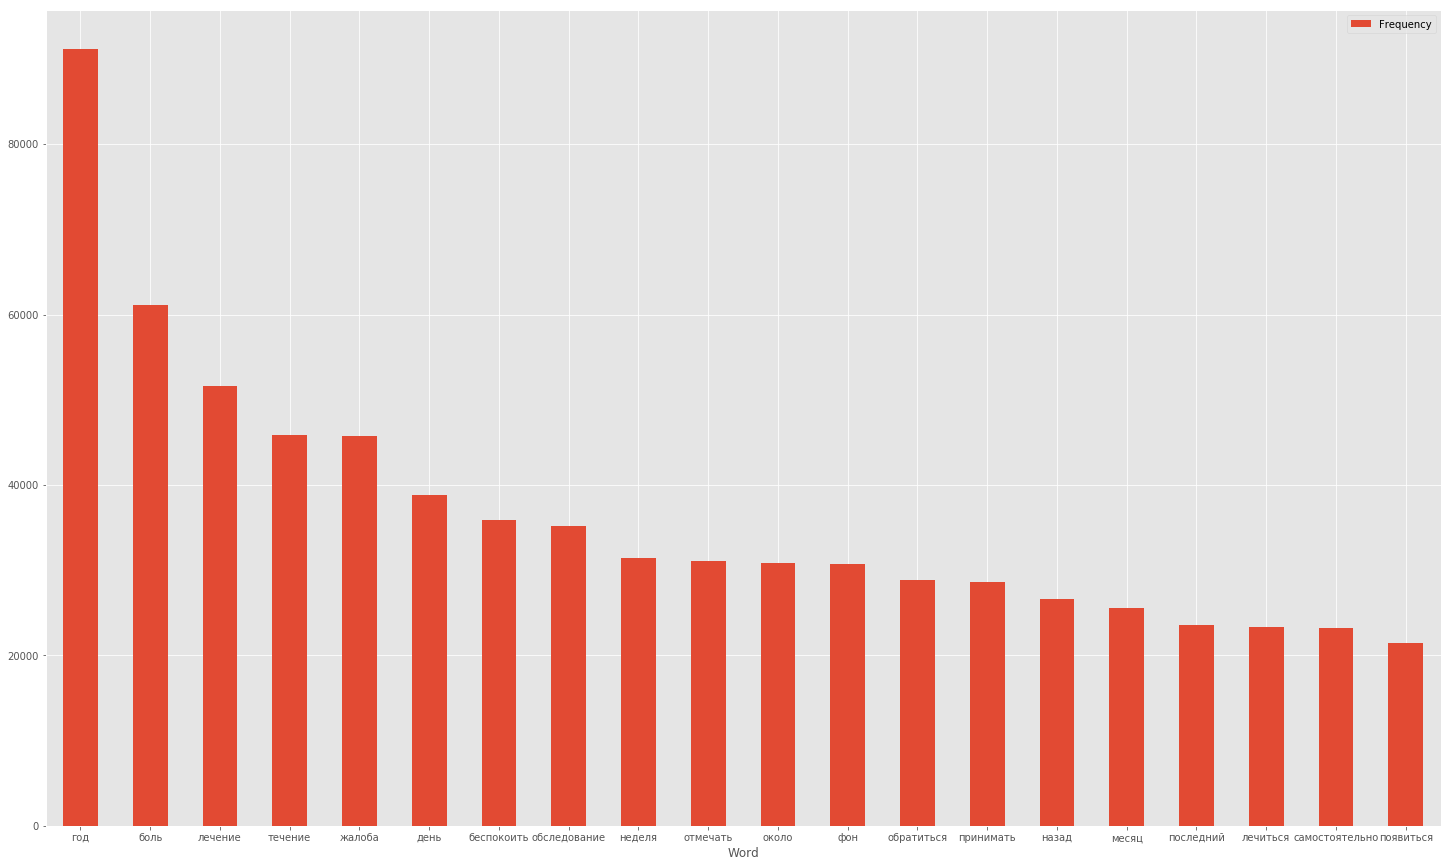

In [99]:
# txt = data.lemm.str.cat(sep=' ')
# words = nltk.tokenize.word_tokenize(txt)
# word_dist = nltk.FreqDist(words)

# stopwords = nltk.corpus.stopwords.words('russian')
# words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

# print('All frequencies, including STOPWORDS:')
# print('=' * 60)
# rslt = pd.DataFrame(word_dist.most_common(20),
#                     columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(20),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0, figsize=(25, 15))

In [5]:
def my_func(a):
    if a.male > a.female:
        a['sex'] = 1
    if a.male < a.female:
        a['sex'] = 2

    return a

In [6]:
data = data.apply(my_func, axis=1)

In [ ]:
data.head()

In [7]:
import difflib

In [8]:
a = str(data['sex'].fillna(0).apply(int).tolist())
b = str(data['Пол'].tolist())

In [47]:
c=b[:10000]

In [48]:
matcher = difflib.SequenceMatcher(a=a, b=c, autojunk=False)
matcher.find_longest_match(0, len(a), 0, len(c))

Match(a=606158, b=4472, size=38)

In [49]:
print(a[606158:606158+100])
print(b[4472:4472+100])

, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0,
, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,


In [38]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.height', 200)

In [90]:
d1 = data[['sex','Внешний осмотр',
       'Возраст', 'Диагноз', 'Код_диагноза', 'Общее состояние', 'Пол',
       'аллергия']][202052:202052+50].reset_index(drop=True)

In [91]:
d2 = data[['Анамнез заболевания']][1490:1490+50].reset_index(drop=True)

In [94]:
pd.concat([d1,d2], axis=1, ignore_index=True)

,0,1,2,3,4,5,6,7,8
0,NaN,,57,Острый трахеит,J04.1,,2,,Провела лечение. Пришла на повторные анализы
1,2.0,,31,Хронический простатит,N41.1,,1,,"22.01.16 двусторонняя тонзиллэктомия, визит для контрольного осмотра"
2,2.0,,31,"Абсцесс кожи, фурункул и карбункул лица",L02.0,,1,,"Повторный прием, см. протокол от 14.04.16г. Пациентка прошла все назначенное обследование, обратилась по результатам. Проходит лечение у кардиолога."
3,2.0,,27,Расстройство вегетативной [автономной] нервной системы неуточненное,G90.9,,2,,"На л/н №271274063350 с 20.07.17 по 24.07.17, явка на 24.07.17, ДН 5, заболел остро около 10 дней назад ОРВИ (затруднение носового дыхания, тяженсть в проекции правой в/ч пазухи), самостоятельно ле..."
4,1.0,,36,Другие синовиты и теносиновиты,M65.8,,2,,жалобы более полугода. Лечения не принимал. Подошел с результатами обследования
5,2.0,,44,"Вагинит, вульвит и вульвовагинит при инфекционных и паразитарных болезнях, классифицированных в других рубриках",N77.1*,,2,,консультация по проведенному обследованию и коррекции лечения
6,1.0,,43,Варикозное расширение вен нижних конечностей без язвы или воспаления,I83.9,,2,,
7,2.0,,27,Подострый и хронический вагинит,N76.1,,2,,"Находится на амбулаторном лечении с диагнозом: Кашель неуточненный. Нельзя исключить аллергический фон заболевания. Бронхиальная астма? Аллергический ринит? Принимает Синекод, ингаляции с Валокар..."
8,2.0,,21,Другие уретриты,N34.2,,1,,
9,2.0,,31,Подострый и хронический вагинит,N76.1,,2,,


In [42]:
data[['sex','Внешний осмотр',
       'Возраст', 'Диагноз', 'Код_диагноза', 'Общее состояние', 'Пол',
       'аллергия']][619:650]

,sex,Внешний осмотр,Возраст,Диагноз,Код_диагноза,Общее состояние,Пол,аллергия
619,NaN,,80,Энцефалопатия неуточненная,G93.4,удовлетворительное.,2,
620,NaN,,32,Диффузная кистозная мастопатия,N60.1,,2,
621,2.0,,28,Камни почки,N20.0,,2,
622,1.0,,65,Остеохондроз позвоночника,M42,,2,
623,NaN,,48,Цервикалгия,M54.2,Состояние удовлетворительное .,1,
624,NaN,,61,Синдром сдавления ротатора плеча,M75.1,,1,
625,NaN,,33,Боль в грудном отделе позвоночника,M54.6,,2,
626,NaN,,79,Гипертензивная болезнь сердца [гипертоническая болезнь сердца с преимущественным поражением сердца],I11,,2,
627,2.0,,26,Гипотиреоз неуточненный,E03.9,,2,
628,NaN,,57,Нарушение сна неуточненное,G47.9,,2,


In [39]:
data[['Анамнез заболевания']][1541:1570]

,Анамнез заболевания
1541,проф.осмотр
1542,"последние 3 месяца испытывает повышетые нагрузки, 3.04.2015 появились чувство жжения в ногах, втирала мазь с мятой"
1543,"Заболела остро около 12 дней назад ОРВИ (затруднение носового дыхания, болезненность в горле, температура 39,0), самостоятельно лечилась хлорофиллипт в горло, називин. 05.10.16 Обратилась к педиат..."
1544,"закончила курс назначенного лечения, отмечает значительное улучшение состояния, однако насморк сохраняется"
1545,"В апреле 2015 г. проведено УЗИ щитводной железы, данные не представлены. Со слво пациентки, рекомендовано провести контроль гормональногостатуса. ВЕС Минимальный вес после 18 лет - 60 кг, п..."
1546,"Утром пациент спрашивал у супруги какой день недели, что делали вчера."
1547,"проводит лечение,прибыла для контроля вчера утром была рвота"
1548,"провела курс лечения,прибыла для коррекции"
1549,"новообразование в на правой голени появилось более 5 лет назад, оперирована в ноябре 2016г. - лазерная фотодеструкция, гистологич. заключение - меланома. В краях резекции - опухолевый рост. В свя..."
1550,"Страдает Гипертонической болезнью около 4-х лет. Постоянно принимает Энап х2 раза в день, Конкор 2,5 мг, Кардиомагнил 75 мг, Винпоцетин 5 мг, Пирацетам 04 х 3 раза в день, Индапамид. Адаптирована ..."
